In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn

from utils import *

In [10]:
model_saving_path =  '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_15sWindow'


In [11]:
train_loader, val_loader, test_loader = create_dataloaders(batch_size=128, version='_Goose_15sW')#, upsample=True)

In [12]:
len(train_loader), len(val_loader), len(test_loader)

(51, 5, 9)

In [13]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 62, 100, 15])
torch.Size([128, 1])
128
128
128


date:180414, rec:001, time:5205.0


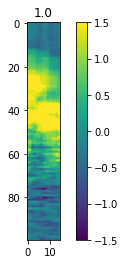

date:180412, rec:003, time:2043.0


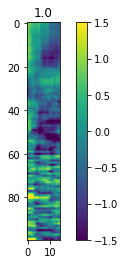

date:180401, rec:001, time:3455.0


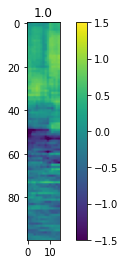

date:180410, rec:003, time:848.0


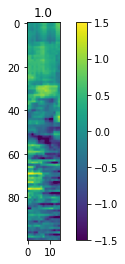

date:180325, rec:003, time:1003.0


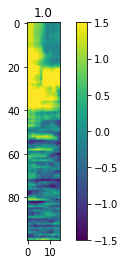

date:180410, rec:006, time:3241.0


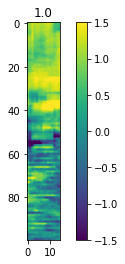

date:180323, rec:006, time:1743.0


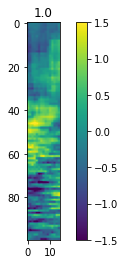

date:180411, rec:002, time:5514.0


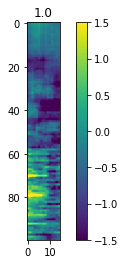

date:180324, rec:003, time:2406.0


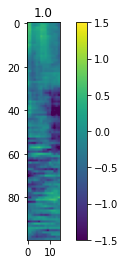

date:180414, rec:004, time:4157.0


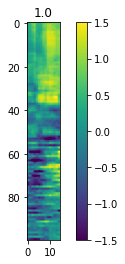

date:180322, rec:004, time:116.0


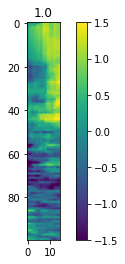

date:180325, rec:004, time:3877.0


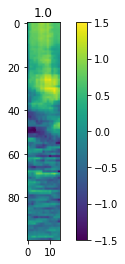

date:180327, rec:002, time:5851.0


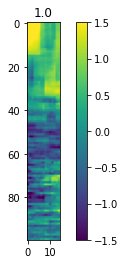

date:180414, rec:001, time:642.0


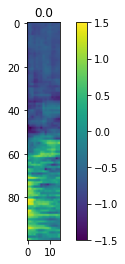

date:180410, rec:002, time:2912.0


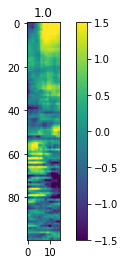

date:180412, rec:001, time:6744.0


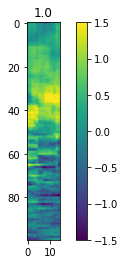

date:180324, rec:001, time:6266.0


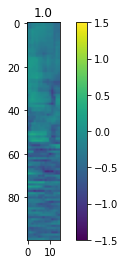

date:180410, rec:003, time:132.0


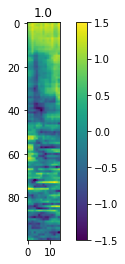

date:180327, rec:004, time:5191.0


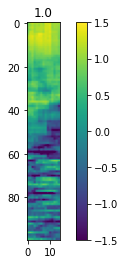

date:180410, rec:003, time:6611.0


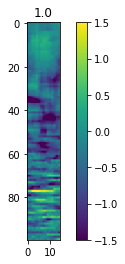

date:180327, rec:006, time:4299.0


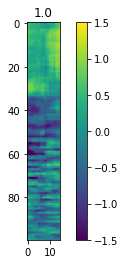

date:180401, rec:001, time:4744.0


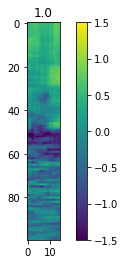

date:180324, rec:006, time:1525.0


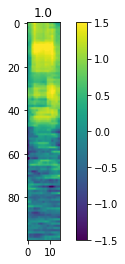

date:180325, rec:005, time:4515.0


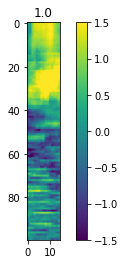

date:180324, rec:005, time:237.0


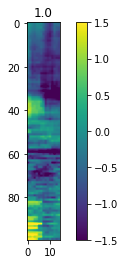

date:180401, rec:002, time:7063.0


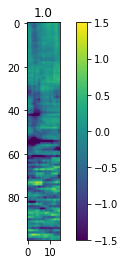

date:180322, rec:007, time:181.0


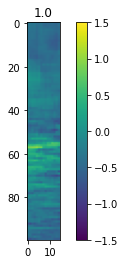

date:180324, rec:008, time:3907.0


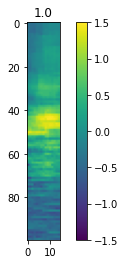

date:180414, rec:004, time:6597.0


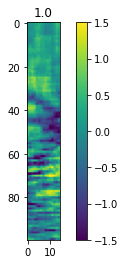

date:180325, rec:003, time:4754.0


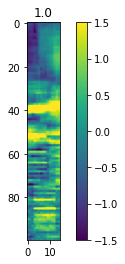

date:180413, rec:005, time:1440.0


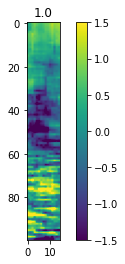

date:180325, rec:007, time:1715.0


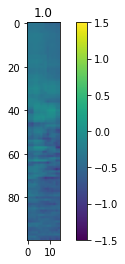

date:180325, rec:001, time:3118.0


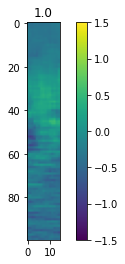

date:180411, rec:002, time:3827.0


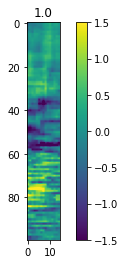

date:180410, rec:002, time:6512.0


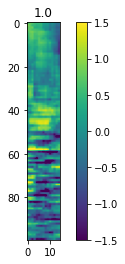

date:180413, rec:006, time:6717.0


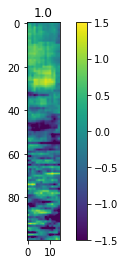

date:180413, rec:004, time:5918.0


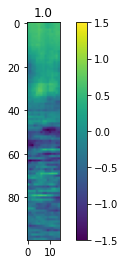

date:180327, rec:004, time:1913.0


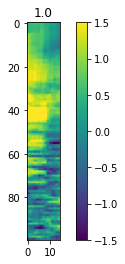

date:180412, rec:006, time:5425.0


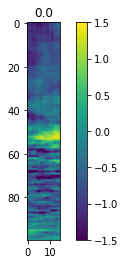

date:180412, rec:005, time:2652.0


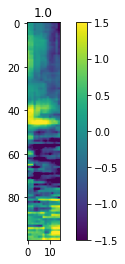

date:180324, rec:005, time:2402.0


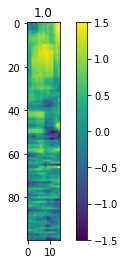

date:180410, rec:006, time:3406.0


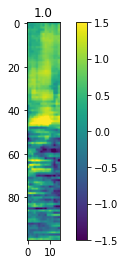

date:180325, rec:004, time:5834.0


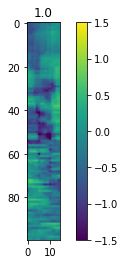

date:180414, rec:003, time:6233.0


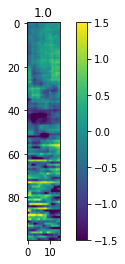

date:180413, rec:008, time:1717.0


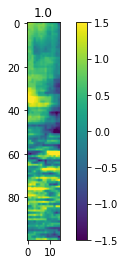

date:180411, rec:006, time:778.0


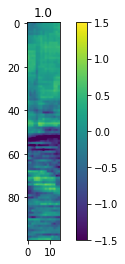

date:180409, rec:003, time:2115.0


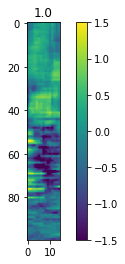

date:180325, rec:003, time:3760.0


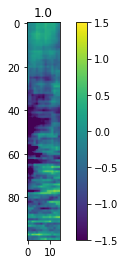

date:180326, rec:003, time:2796.0


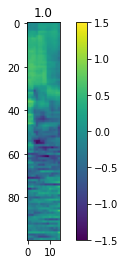

date:180414, rec:003, time:6188.0


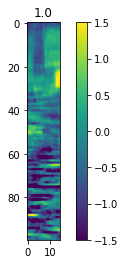

date:180325, rec:001, time:4698.0


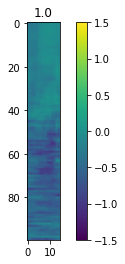

date:180324, rec:009, time:1465.0


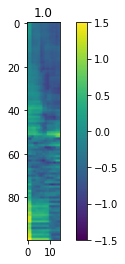

date:180410, rec:006, time:3526.0


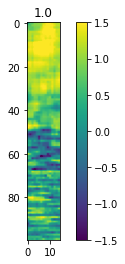

date:180325, rec:006, time:3625.0


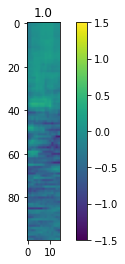

date:180322, rec:002, time:4581.0


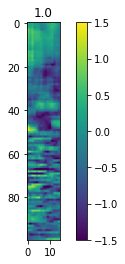

date:180325, rec:002, time:372.0


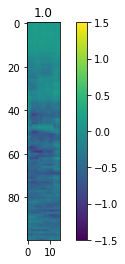

date:180323, rec:002, time:327.0


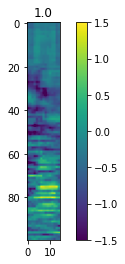

date:180409, rec:006, time:1711.0


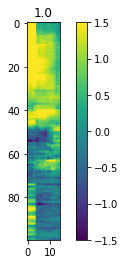

date:180412, rec:002, time:4734.0


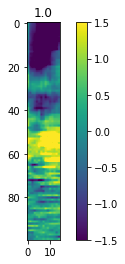

date:180324, rec:004, time:6900.0


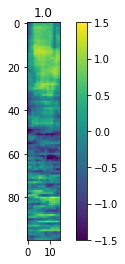

date:180414, rec:005, time:4711.0


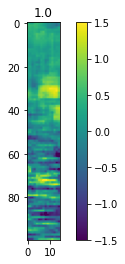

date:180401, rec:001, time:3066.0


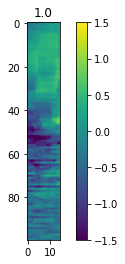

date:180409, rec:004, time:5862.0


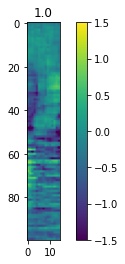

date:180414, rec:003, time:487.0


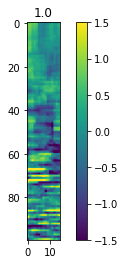

date:180327, rec:004, time:4246.0


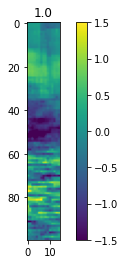

date:180323, rec:004, time:3375.0


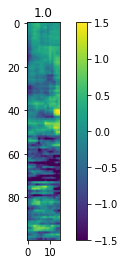

date:180413, rec:004, time:6769.0


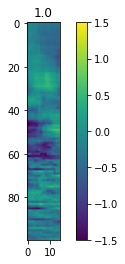

date:180413, rec:002, time:3175.0


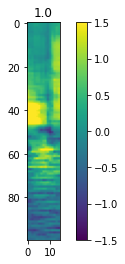

date:180413, rec:008, time:4851.0


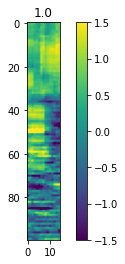

date:180325, rec:003, time:709.0


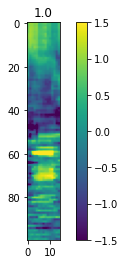

date:180411, rec:003, time:4821.0


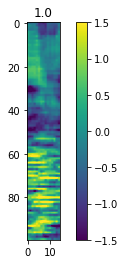

date:180409, rec:005, time:4508.0


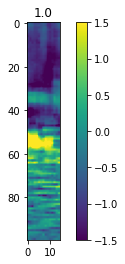

date:180325, rec:004, time:1230.0


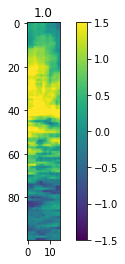

date:180327, rec:008, time:6721.0


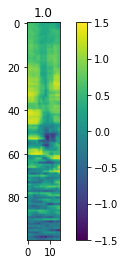

date:180325, rec:003, time:2672.0


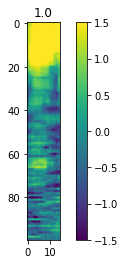

date:180414, rec:004, time:5037.0


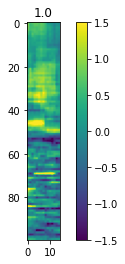

date:180409, rec:004, time:1014.0


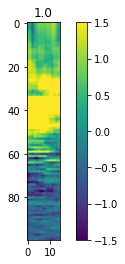

date:180322, rec:005, time:7136.0


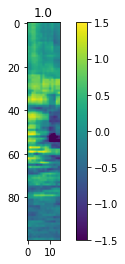

date:180412, rec:005, time:401.0


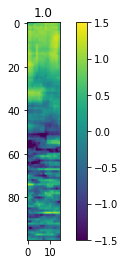

date:180413, rec:004, time:3976.0


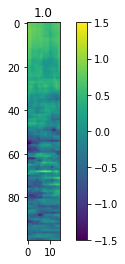

date:180323, rec:002, time:5467.0


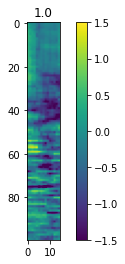

date:180327, rec:001, time:2467.0


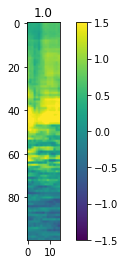

date:180324, rec:008, time:4252.0


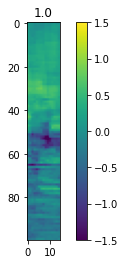

date:180413, rec:006, time:672.0


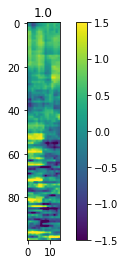

date:180411, rec:006, time:1183.0


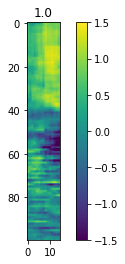

date:180325, rec:006, time:3490.0


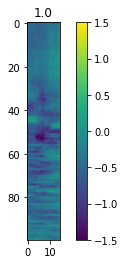

date:180411, rec:005, time:2322.0


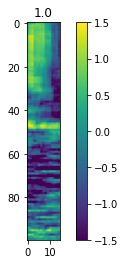

date:180325, rec:005, time:1746.0


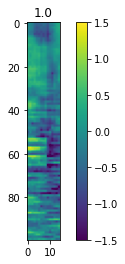

date:180411, rec:004, time:4925.0


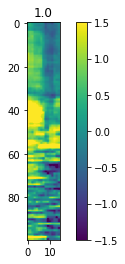

date:180414, rec:004, time:1372.0


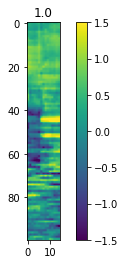

date:180322, rec:005, time:6771.0


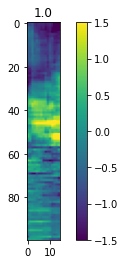

date:180323, rec:003, time:989.0


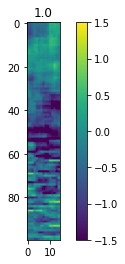

date:180412, rec:002, time:5906.0


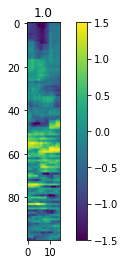

date:180414, rec:001, time:6355.0


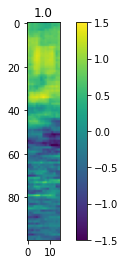

date:180323, rec:001, time:7149.0


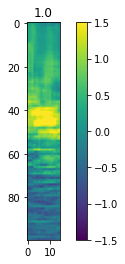

date:180326, rec:003, time:6015.0


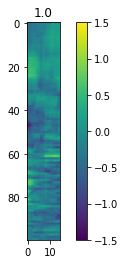

date:180325, rec:005, time:6290.0


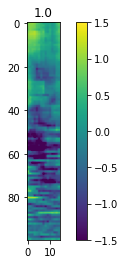

date:180409, rec:005, time:1047.0


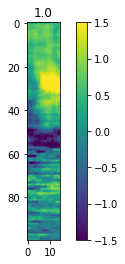

date:180322, rec:002, time:6408.0


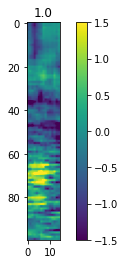

date:180324, rec:008, time:398.0


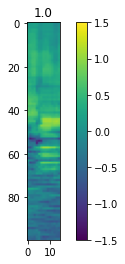

date:180325, rec:006, time:781.0


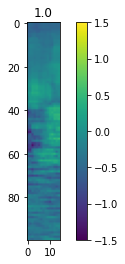

date:180323, rec:005, time:2144.0


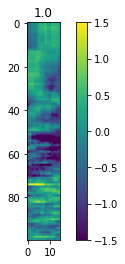

date:180410, rec:005, time:3071.0


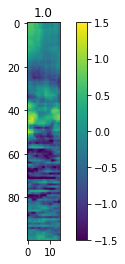

date:180411, rec:002, time:1852.0


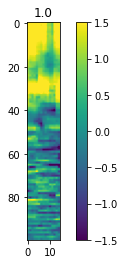

date:180323, rec:003, time:3553.0


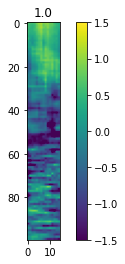

date:180326, rec:003, time:576.0


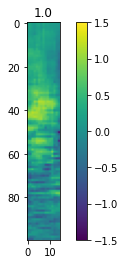

date:180325, rec:001, time:5208.0


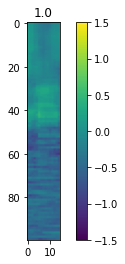

date:180324, rec:006, time:6155.0


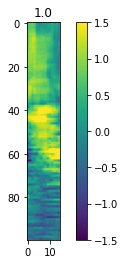

date:180325, rec:004, time:1245.0


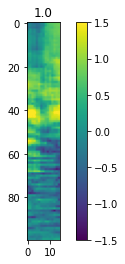

date:180324, rec:003, time:4442.0


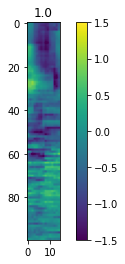

date:180323, rec:001, time:6580.0


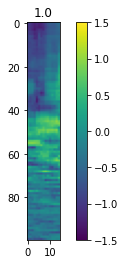

date:180410, rec:004, time:7180.0


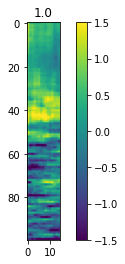

date:180324, rec:006, time:5750.0


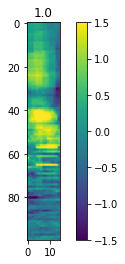

date:180327, rec:005, time:2882.0


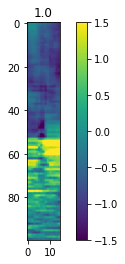

date:180412, rec:002, time:5621.0


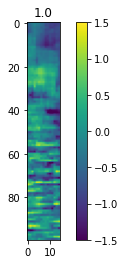

date:180410, rec:002, time:5374.0


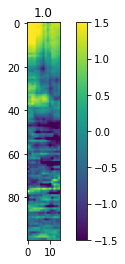

date:180327, rec:004, time:777.0


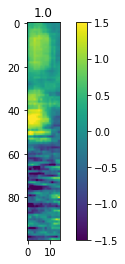

date:180324, rec:004, time:4881.0


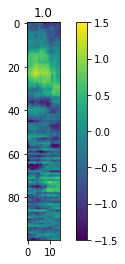

date:180401, rec:001, time:6995.0


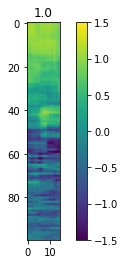

date:180414, rec:004, time:1687.0


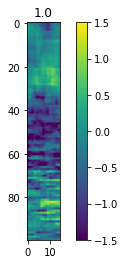

date:180410, rec:004, time:2340.0


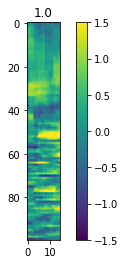

date:180410, rec:002, time:1949.0


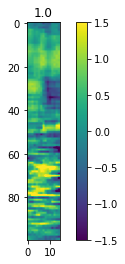

date:180412, rec:002, time:1199.0


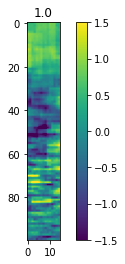

date:180401, rec:001, time:2301.0


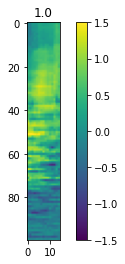

date:180327, rec:006, time:5305.0


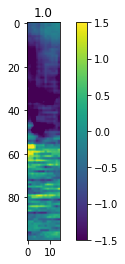

date:180410, rec:006, time:6531.0


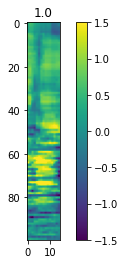

date:180410, rec:002, time:6872.0


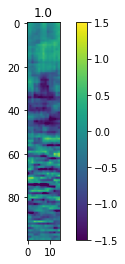

date:180414, rec:004, time:2227.0


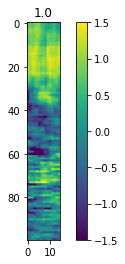

In [14]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tol = 0.01
learning_rate = 0.001
num_epochs = 51
l2 = 0
alpha = 0
CH = 'all'
timewindow = 15

model = LogReg().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

cuda


In [16]:
epochs = []
training_losses = []
training_acc = []
val_losses = []
validation_acc = []

train_predictions = []
validation_predictions = []
train_preds_probs = []
validation_preds_probs = []
train_labels = []
validation_labels = []

for epoch in range(num_epochs):
    avg_train_loss, train_acc, train_preds, train_preds_probs, train_labs = train(model, criterion, optimizer, train_loader, epoch, alpha=alpha, timewindow = timewindow)
    print('Train loss for epoch {}: {}'.format(epoch, avg_train_loss))
    val_loss, val_acc, val_preds, val_preds_probs, val_labels = test(model, criterion, optimizer, val_loader)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            print(epoch)
            path =model_saving_path
            torch.save(model.state_dict(), '{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(avg_train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    train_predictions.append(train_preds)
    train_labels.append(train_labs)
    train_preds_probs.append(train_preds_probs)
    validation_predictions.append(val_preds)
    validation_labels.append(val_labels)
    validation_preds_probs.append(val_preds_probs)
    
    if avg_train_loss < tol:
        break

Train loss for epoch 0: 3.041733980178833
Val loss for epoch 0: 1.2852919101715088
Train loss for epoch 1: 1.568434476852417
Val loss for epoch 1: 0.47596660256385803
1
Train loss for epoch 2: 0.972288966178894
Val loss for epoch 2: 0.6878191232681274
Train loss for epoch 3: 0.7229858636856079
Val loss for epoch 3: 0.8565251231193542
Train loss for epoch 4: 0.5879459381103516
Val loss for epoch 4: 0.9628795981407166
Train loss for epoch 5: 0.6356565952301025
Val loss for epoch 5: 0.5270034670829773
Train loss for epoch 6: 0.729892909526825
Val loss for epoch 6: 0.7075323462486267
Train loss for epoch 7: 0.5314800143241882
Val loss for epoch 7: 1.0689964294433594
Train loss for epoch 8: 0.5166970491409302
Val loss for epoch 8: 0.7301461100578308
Train loss for epoch 9: 0.5678349733352661
Val loss for epoch 9: 1.1688460111618042
Train loss for epoch 10: 0.5582020282745361
Val loss for epoch 10: 0.6558988690376282
Train loss for epoch 11: 0.5187420845031738
Val loss for epoch 11: 1.620488

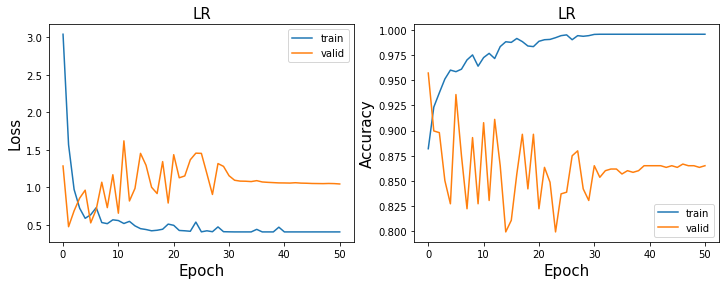

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

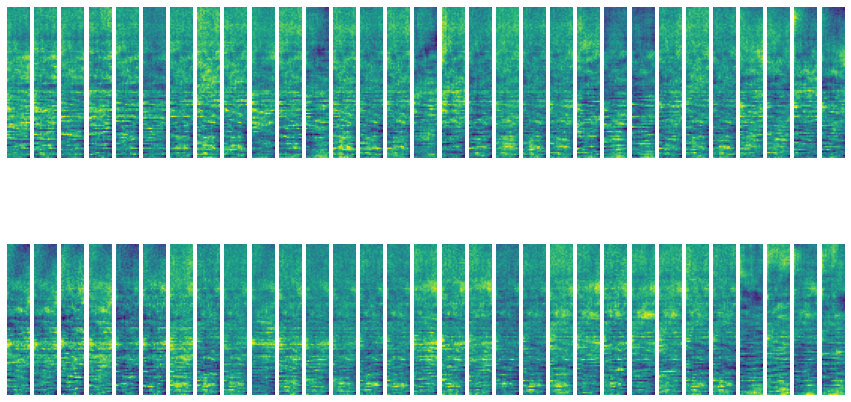

In [19]:
model = LogReg().to(device)
path = model_saving_path
epoch_num = 1
model.load_state_dict(torch.load('{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha,epoch_num)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [20]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = test(model, criterion, optimizer, test_loader, mode='test')
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:2.416130304336548 accuracy:0.8910891089108911


In [21]:
np.mean(np.concatenate(test_labels))

0.97029704

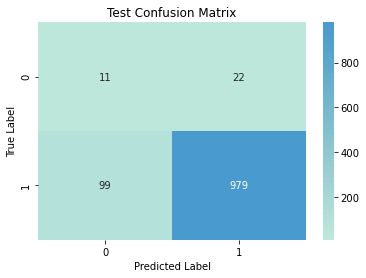

In [22]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


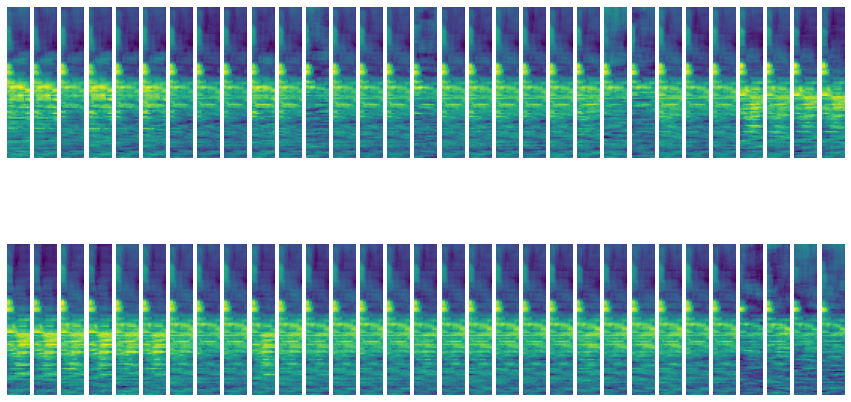

In [23]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][1], cases_wrong_0[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_0[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tol = 0.01
learning_rate = 0.001
num_epochs = 51
l2 = 0.1
alpha = 0
CH = 'all'
timewindow = 15

model = LogReg().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=l2)

cuda


In [26]:
epochs = []
training_losses = []
training_acc = []
val_losses = []
validation_acc = []

train_predictions = []
validation_predictions = []
train_preds_probs = []
validation_preds_probs = []
train_labels = []
validation_labels = []

for epoch in range(num_epochs):
    avg_train_loss, train_acc, train_preds, train_preds_probs, train_labs = train(model, criterion, optimizer, train_loader, epoch, timewindow = timewindow, alpha=alpha)
    print('Train loss for epoch {}: {}'.format(epoch, avg_train_loss))
    val_loss, val_acc, val_preds, val_preds_probs, val_labels = test(model, criterion, optimizer, val_loader)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(avg_train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    train_predictions.append(train_preds)
    train_labels.append(train_labs)
    train_preds_probs.append(train_preds_probs)
    validation_predictions.append(val_preds)
    validation_labels.append(val_labels)
    validation_preds_probs.append(val_preds_probs)
    
    if avg_train_loss < tol:
        break

Train loss for epoch 0: 2.1730875968933105
Val loss for epoch 0: 0.5974591970443726
Train loss for epoch 1: 0.7383743524551392
Val loss for epoch 1: 0.5960375070571899
1
Train loss for epoch 2: 0.6751905679702759
Val loss for epoch 2: 0.4542485773563385
2
Train loss for epoch 3: 0.5931887030601501
Val loss for epoch 3: 0.6533097624778748
Train loss for epoch 4: 0.4975932538509369
Val loss for epoch 4: 0.6507991552352905
Train loss for epoch 5: 0.34016621112823486
Val loss for epoch 5: 0.48643919825553894
Train loss for epoch 6: 0.24363164603710175
Val loss for epoch 6: 0.41599518060684204
6
Train loss for epoch 7: 0.3509666323661804
Val loss for epoch 7: 0.6072911024093628
Train loss for epoch 8: 0.4557797908782959
Val loss for epoch 8: 0.8387813568115234
Train loss for epoch 9: 0.5865361094474792
Val loss for epoch 9: 0.38492056727409363
9
Train loss for epoch 10: 0.44549036026000977
Val loss for epoch 10: 0.5418006181716919
Train loss for epoch 11: 0.7496216297149658
Val loss for epo

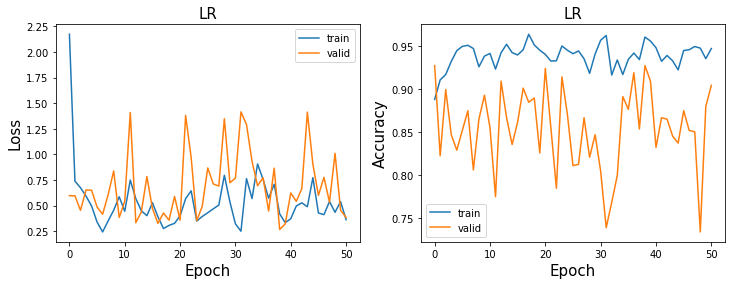

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

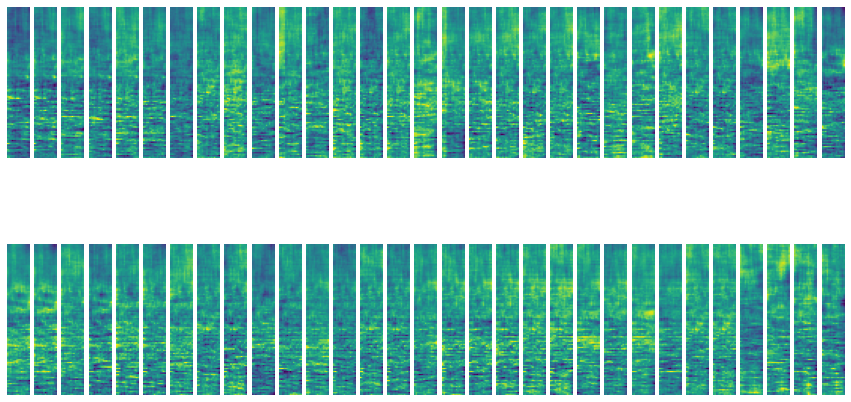

In [29]:
model = LogReg().to(device)
path = model_saving_path
epoch = 38
model.load_state_dict(torch.load('{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [30]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_1 = test(model, criterion, optimizer, test_loader, mode='test')
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.4426884651184082 accuracy:0.9234923492349235


In [31]:
np.mean(np.concatenate(test_labels))

0.97029704

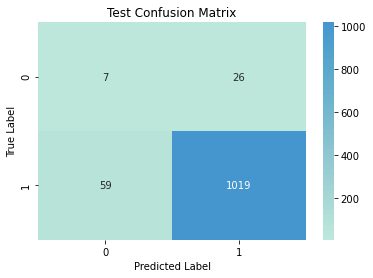

In [32]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:006, time:006, label:1.0
Original data 62 CH


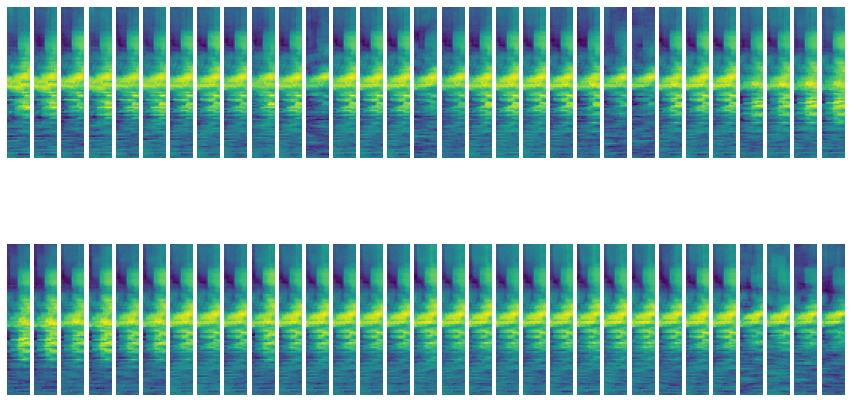

In [33]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][1], cases_wrong_1[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_1[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tol = 0.01
learning_rate = 0.001
num_epochs = 51
l2 = 0
alpha = 0.1
CH = 'all'
timewindow = 15

model = LogReg().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

cuda


In [35]:
epochs = []
training_losses = []
training_acc = []
val_losses = []
validation_acc = []

train_predictions = []
validation_predictions = []
train_preds_probs = []
validation_preds_probs = []
train_labels = []
validation_labels = []


for epoch in range(num_epochs):
    avg_train_loss, train_acc, train_preds, train_preds_probs, train_labs = train(model, criterion, optimizer, train_loader, epoch,timewindow = timewindow, alpha=alpha)
    print('Train loss for epoch {}: {}'.format(epoch, avg_train_loss))
    val_loss, val_acc, val_preds, val_preds_probs, val_labels = test(model, criterion, optimizer, val_loader)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(avg_train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    train_predictions.append(train_preds)
    train_labels.append(train_labs)
    train_preds_probs.append(train_preds_probs)
    validation_predictions.append(val_preds)
    validation_labels.append(val_labels)
    validation_preds_probs.append(val_preds_probs)
    
    if avg_train_loss < tol:
        break

Train loss for epoch 0: 2.187877893447876
Val loss for epoch 0: 1.2435637712478638
Train loss for epoch 1: 1.186020851135254
Val loss for epoch 1: 0.8645164370536804
1
Train loss for epoch 2: 1.101550817489624
Val loss for epoch 2: 0.7061058878898621
2
Train loss for epoch 3: 0.7684375047683716
Val loss for epoch 3: 0.4972406029701233
3
Train loss for epoch 4: 0.8967310786247253
Val loss for epoch 4: 0.3771839737892151
4
Train loss for epoch 5: 0.8081929087638855
Val loss for epoch 5: 0.8781930208206177
Train loss for epoch 6: 0.7482824921607971
Val loss for epoch 6: 0.38139304518699646
Train loss for epoch 7: 0.7425807118415833
Val loss for epoch 7: 0.6939338445663452
Train loss for epoch 8: 0.7794898748397827
Val loss for epoch 8: 0.46021324396133423
Train loss for epoch 9: 0.7096846103668213
Val loss for epoch 9: 1.257939338684082
Train loss for epoch 10: 0.7644951939582825
Val loss for epoch 10: 0.7713834047317505
Train loss for epoch 11: 0.8068893551826477
Val loss for epoch 11: 1

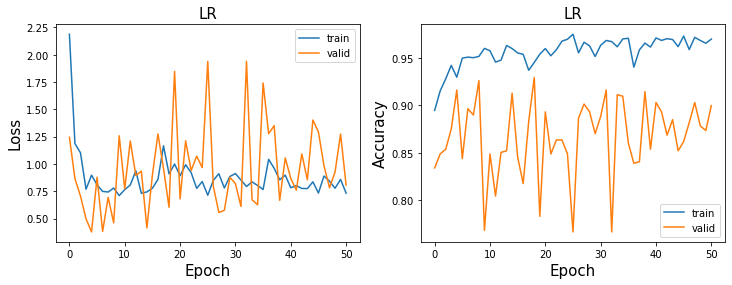

In [36]:
plt.figure(figsize=(12,4)) # upsample
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

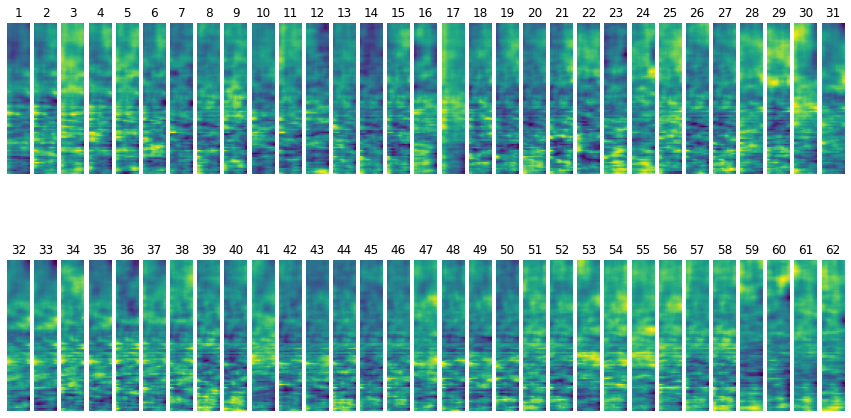

In [38]:
model = LogReg().to(device)
path = model_saving_path
epoch = 4
model.load_state_dict(torch.load('{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha,epoch)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [39]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_2 = test(model, criterion, optimizer, test_loader, mode='test')
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:2.0405502319335938 accuracy:0.9324932493249325


In [40]:
np.mean(np.concatenate(test_labels))

0.97029704

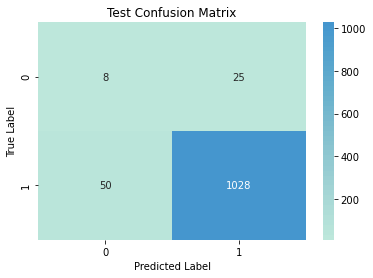

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:003, time:003, label:1.0
Original data 62 CH


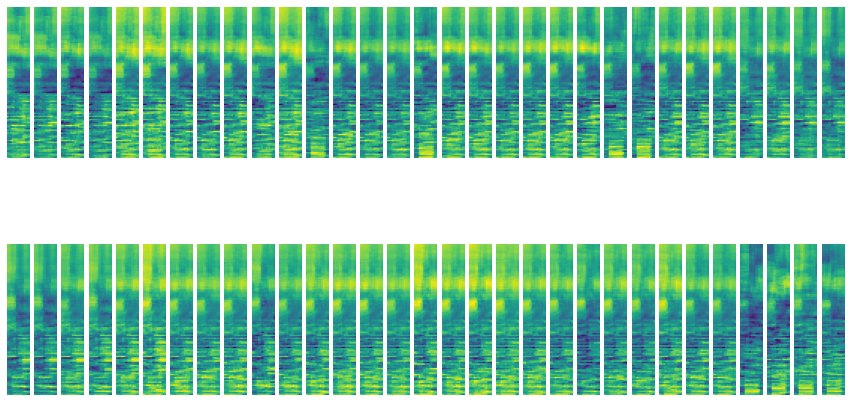

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_2[0][0], cases_wrong_2[0][1], cases_wrong_2[0][1], cases_wrong_2[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_2[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()